In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


<AxesSubplot:title={'center':'한글'}>

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
/Users/jihye/opt/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jihye/opt/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


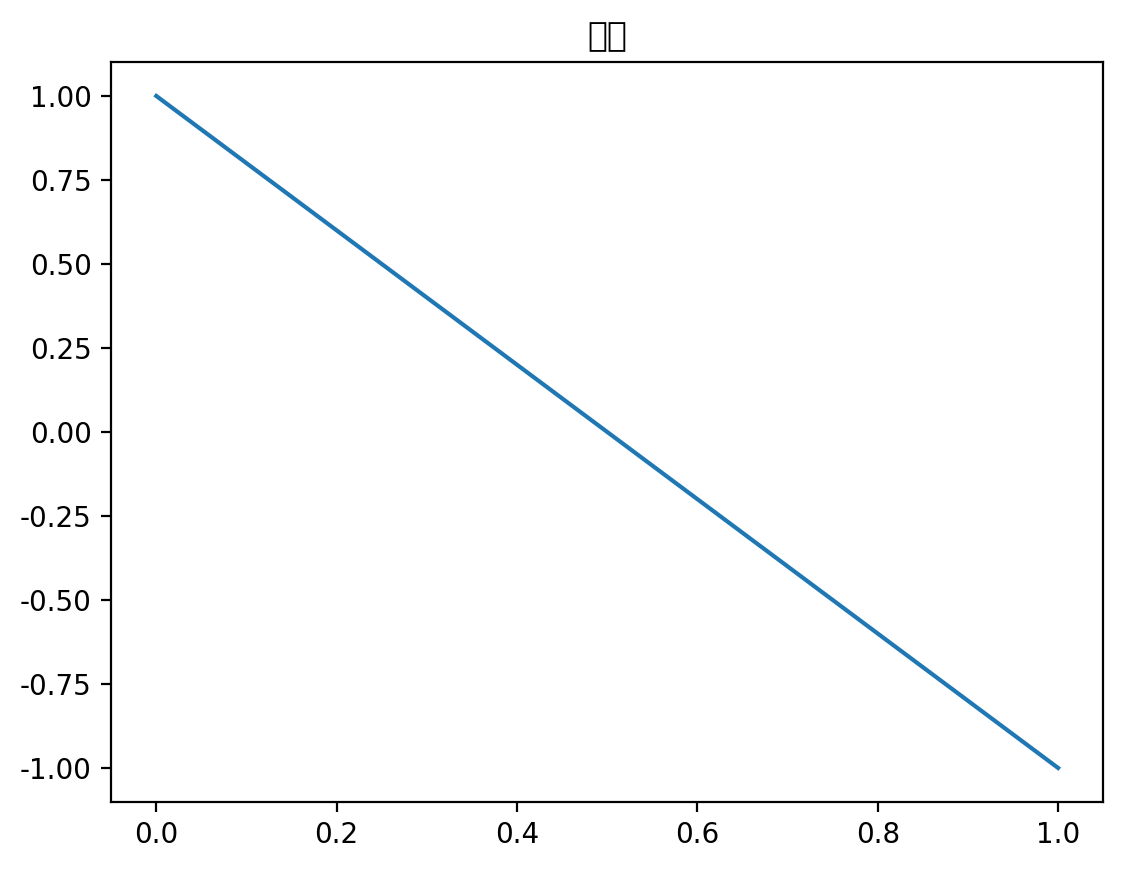

In [12]:
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
pd.Series([1,-1]).plot(title='한글')

In [13]:
train = pd.read_csv("train.csv")
train.columns

Index(['ID', 'img_path', 'mask_path', '나이', '수술연월일', '진단명', '암의 위치', '암의 개수',
       '암의 장경', 'NG', 'HG', 'HG_score_1', 'HG_score_2', 'HG_score_3',
       'DCIS_or_LCIS_여부', 'DCIS_or_LCIS_type', 'T_category', 'ER',
       'ER_Allred_score', 'PR', 'PR_Allred_score', 'KI-67_LI_percent', 'HER2',
       'HER2_IHC', 'HER2_SISH', 'HER2_SISH_ratio', 'BRCA_mutation',
       'N_category'],
      dtype='object')

In [5]:
train = train.dropna()

In [6]:
test = pd.read_csv("test.csv")
test.head(5)

,ID,img_path,나이,수술연월일,진단명,암의 위치,암의 개수,암의 장경,NG,HG,...,ER,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation
0,BC_01_0011,./test_imgs/BC_01_0011.png,55,2015-11-17,2,2,1,23.0,2.0,2.0,...,1.0,8.0,0.0,2.0,5.00,0.0,1.0,NaN,NaN,NaN
1,BC_01_0220,./test_imgs/BC_01_0220.png,43,2020-06-09,4,2,1,13.0,3.0,2.0,...,1.0,4.0,1.0,8.0,8.67,0.0,0.0,NaN,NaN,NaN
2,BC_01_0233,./test_imgs/BC_01_0233.png,76,2020-05-14,1,1,1,NaN,NaN,NaN,...,1.0,6.0,1.0,6.0,NaN,NaN,2.0,NaN,NaN,NaN
3,BC_01_0258,./test_imgs/BC_01_0258.png,58,2020-05-20,1,2,1,1.3,2.0,2.0,...,1.0,7.0,0.0,NaN,21.17,1.0,3.0,NaN,NaN,0.0
4,BC_01_0260,./test_imgs/BC_01_0260.png,56,2020-05-20,1,2,2,15.0,3.0,3.0,...,1.0,8.0,1.0,3.0,20.57,1.0,3.0,NaN,NaN,NaN


In [7]:
test.dropna()

,ID,img_path,나이,수술연월일,진단명,암의 위치,암의 개수,암의 장경,NG,HG,...,ER,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation
12,BC_01_0296,./test_imgs/BC_01_0296.png,52,2020-03-24,1,2,2,8.0,2.0,2.0,...,1.0,7.0,1.0,4.0,4.84,0.0,2.0,0.0,1.15,0.0


array([[<AxesSubplot:title={'center':'나이'}>,
        <AxesSubplot:title={'center':'진단명'}>,
        <AxesSubplot:title={'center':'암의 위치'}>,
        <AxesSubplot:title={'center':'암의 개수'}>,
        <AxesSubplot:title={'center':'암의 장경'}>],
       [<AxesSubplot:title={'center':'NG'}>,
        <AxesSubplot:title={'center':'HG'}>,
        <AxesSubplot:title={'center':'HG_score_1'}>,
        <AxesSubplot:title={'center':'HG_score_2'}>,
        <AxesSubplot:title={'center':'HG_score_3'}>],
       [<AxesSubplot:title={'center':'DCIS_or_LCIS_여부'}>,
        <AxesSubplot:title={'center':'DCIS_or_LCIS_type'}>,
        <AxesSubplot:title={'center':'T_category'}>,
        <AxesSubplot:title={'center':'ER'}>,
        <AxesSubplot:title={'center':'ER_Allred_score'}>],
       [<AxesSubplot:title={'center':'PR'}>,
        <AxesSubplot:title={'center':'PR_Allred_score'}>,
        <AxesSubplot:title={'center':'KI-67_LI_percent'}>,
        <AxesSubplot:title={'center':'HER2'}>,
        <AxesSubplot:title={'c

/Users/jihye/opt/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jihye/opt/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jihye/opt/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jihye/opt/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jihye/opt/anaconda3/envs/py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47749 (\N

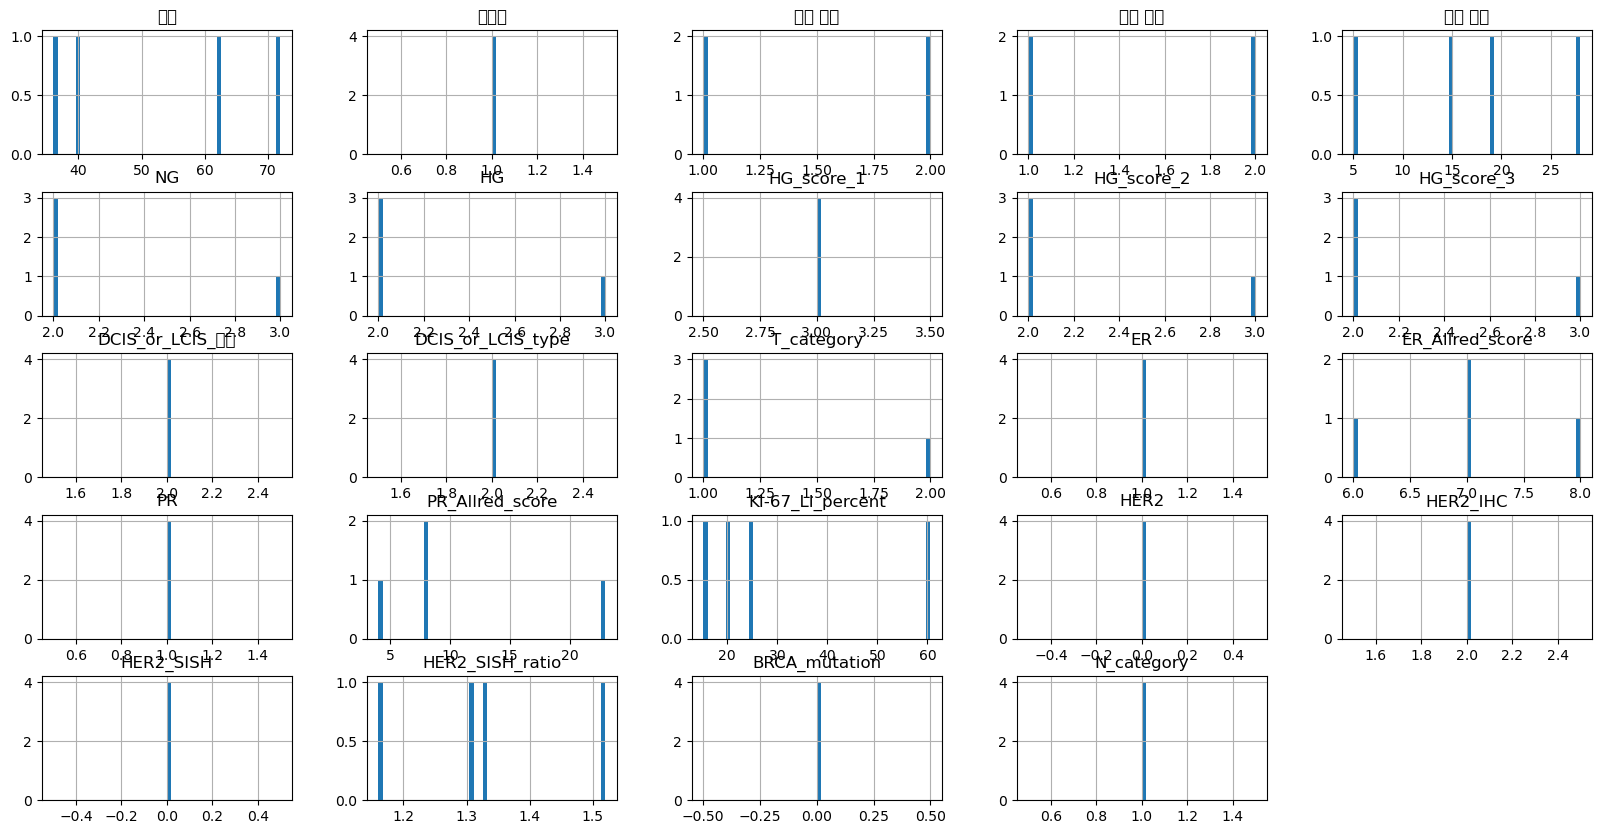

In [8]:
train.hist(figsize=(20, 10), bins=50)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
